In [9]:
import pandas as pd
from google.cloud import bigquery
import matplotlib.pyplot as plt

# Create a BigQuery client
client = bigquery.Client.from_service_account_json("C:\\Users\\GalipŞahin\\Desktop\\Kişisel\\Dream\\galipsahin15.json")

# SQL query to randomly sample 1 in 100,000 of the dataset
query = """
SELECT * FROM `casedreamgames.Analytics.dataset_level_start`
WHERE RAND() < 0.001
"""

# Run the query and get the result as a dataframe
df_sample = client.query(query).to_dataframe()

# Print the number of sampled data
print(f"Number of sampled data: {df_sample.shape[0]}")


Number of sampled data: 73752


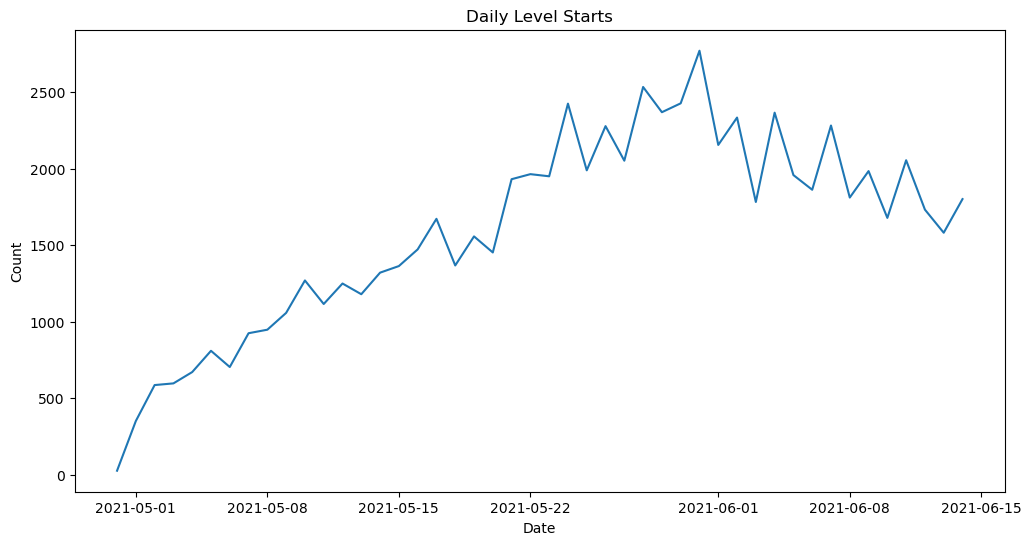

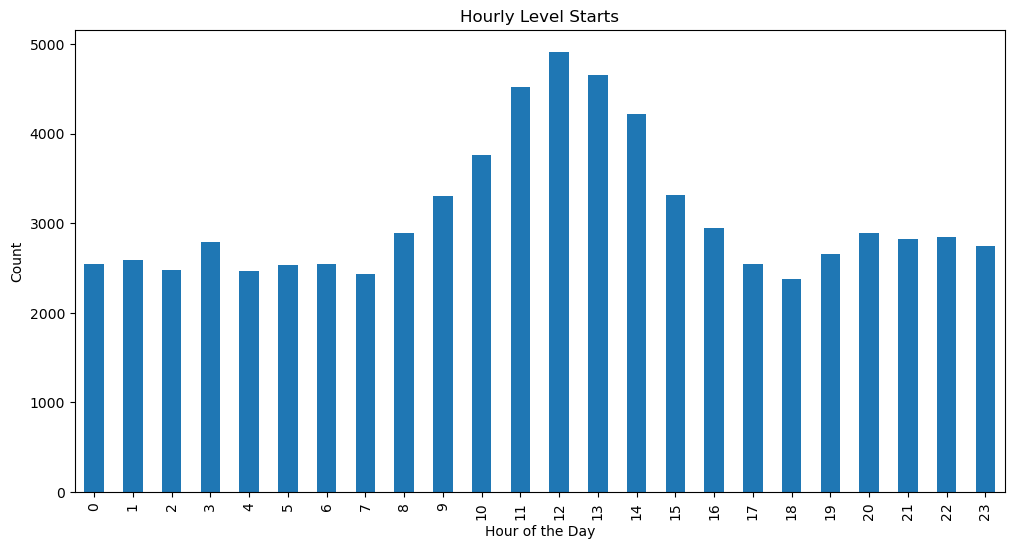

In [10]:
# Convert the event_time column to datetime format
df_sample['event_time'] = pd.to_datetime(df_sample['event_time'])

# Calculate daily level starts
daily_level_starts = df_sample.groupby(df_sample['event_time'].dt.date).size()

# Calculate daily active users
daily_active_users = df_sample.groupby(df_sample['event_time'].dt.date)['user_id'].nunique()

# Compare level starts by platform
platform_distribution = df_sample.groupby([df_sample['event_time'].dt.date, 'platform']).size().unstack()

# Calculate level starts by hour of the day
hourly_level_starts = df_sample.groupby(df_sample['event_time'].dt.hour).size()

# Data visualization
plt.figure(figsize=(12, 6))
daily_level_starts.plot()
plt.title('Daily Level Starts')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
hourly_level_starts.plot(kind='bar')
plt.title('Hourly Level Starts')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xticks(range(24), range(24))  # Set hour labels correctly
plt.show()


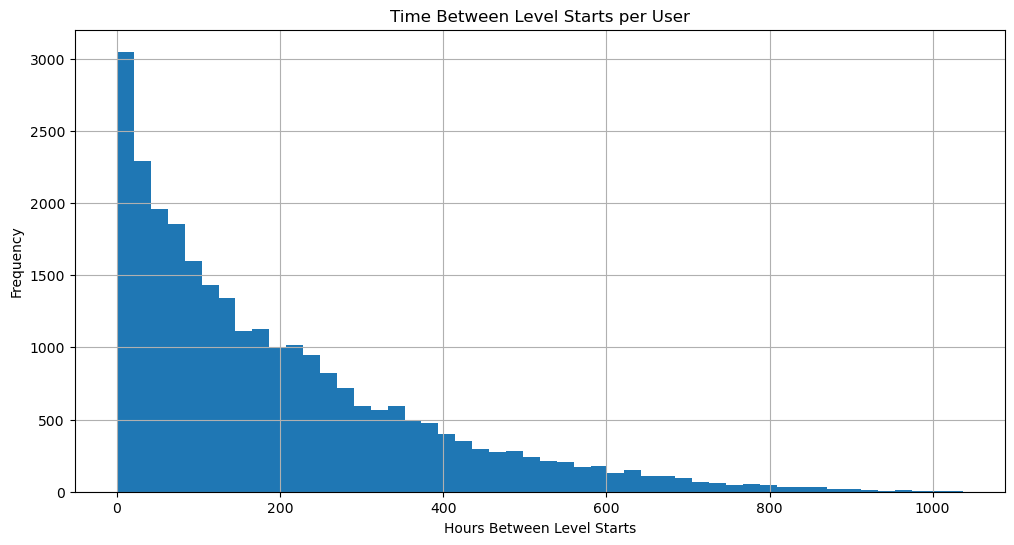

In [11]:
# Convert the event_time column to datetime format
df_sample['event_time'] = pd.to_datetime(df_sample['event_time'])

# Sort level start times by user
df_sample = df_sample.sort_values(by=['user_id', 'event_time'])

# Calculate level start time differences per user
df_sample['prev_event_time'] = df_sample.groupby('user_id')['event_time'].shift(1)
df_sample['time_diff'] = (df_sample['event_time'] - df_sample['prev_event_time']).dt.total_seconds() / 3600  # In hours

# Create a histogram of time differences
plt.figure(figsize=(12, 6))
df_sample['time_diff'].dropna().hist(bins=50)
plt.title('Time Between Level Starts per User')
plt.xlabel('Hours Between Level Starts')
plt.ylabel('Frequency')
plt.show()
